In [1]:
import pandas as pd 

In [53]:
df= pd.read_csv("Financial_inclusion_dataset.csv")

In [27]:
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [30]:
df = df.drop(['uniqueid'] ,axis =1)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [85]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [86]:
df.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [87]:
df.duplicated().sum()

0

In [8]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_notebook_iframe()

C:\Users\Lenovo\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\Lenovo\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### checking and deleting outliers

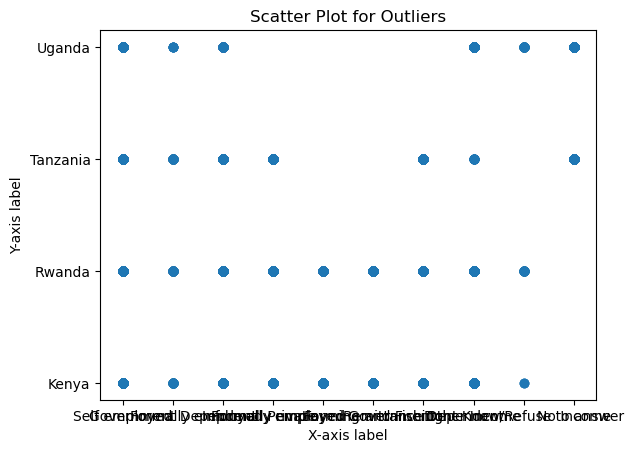

In [89]:
plt.scatter(df['job_type'], df['country'])
plt.title('Scatter Plot for Outliers')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.show()

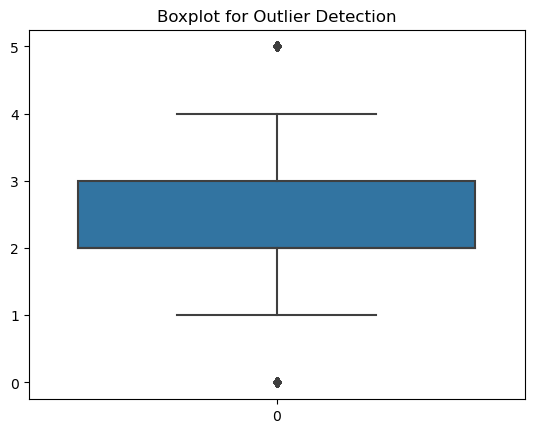

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset
sns.boxplot(data=df['education_level'])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [33]:
(df['marital_status']== 'Dont know').sum()

8

In [34]:
mask = df['marital_status'] == 'Dont know'
df = df.drop(df[mask].index, axis=0)

In [35]:
df['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [36]:
(df['education_level']== 'Other/Dont know/RTA').sum()

35

In [37]:
mask =df['education_level']== 'Other/Dont know/RTA'
df = df.drop(df[mask].index, axis=0)

In [38]:
df['job_type'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [39]:
(df['job_type']== 'Dont Know/Refuse to answer').sum()

126

In [40]:
mask =df['job_type']== 'Dont Know/Refuse to answer'
df = df.drop(df[mask].index, axis=0)

In [51]:
from sklearn.preprocessing import LabelEncoder
columns = ['relationship_with_head', 'marital_status', 'education_level', 'job_type', 'gender_of_respondent','country','bank_account','location_type','cellphone_access']

# Initialize LabelEncoder
label_encoder = LabelEncoder()
for col in columns: 
    df[col] = label_encoder.fit_transform(df[col])


In [52]:
df['bank_account'].unique()

array([1, 0])

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report

# Generating a sample dataset
X = df.drop(['bank_account'],axis = 1)
y = df['bank_account']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Logistic Regression model
logistic_model = LogisticRegression()

# Training the model
logistic_model.fit(X_train, y_train)

# Making predictions on the test set
predictions = logistic_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Generating a classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      4042
           1       0.62      0.24      0.34       629

    accuracy                           0.88      4671
   macro avg       0.76      0.61      0.64      4671
weighted avg       0.86      0.88      0.85      4671



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
import pickle
with open('logistic_model.pkl', 'wb') as f:  # open a text file
    pickle.dump(logistic_model, f) # serialize the list
f.close()

In [47]:
with open('label_encoder.pkl', 'wb') as f:  # open a text file
    pickle.dump(label_encoder, f) # serialize the list
f.close()